In [1]:
# setup for Colab
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
# download packages
!pip install numpy
!pip install pandas
!pip install sklearn

# import packages
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=f0a4a04db558108153aef4317d5dca811430fe438fcd683f8f22e5e2c6216436
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [3]:
root_dir = '/content/gdrive/MyDrive/oc_projet_7'
data_path = root_dir + '/data/' + 'df_preprocessed_1.pkl'

## Get data

In [4]:
# load df
test_mode = False
test_mode_samples = 1000

df_processed = pd.read_pickle(data_path)
if test_mode:
    df_processed = df_processed.sample(n=test_mode_samples, random_state=0)
df_processed

,text,label
0,"[@switchfoot, http://twitpic.com/2y1zl, -, aww...",0
1,"[is, upset, that, he, cannot, update, his, fac...",0
2,"[@kenichan, i, dived, many, time, for, the, ba...",0
3,"[my, whole, body, feel, itchy, and, like, it, ...",0
4,"[@nationwideclass, no, ,, it, is, not, behavin...",0
...,...,...
1599995,"[just, woke, up, ., having, no, school, is, th...",4
1599996,"[thewdb.com, -, very, cool, to, hear, old, wal...",4
1599997,"[are, you, ready, for, your, mojo, makeover, ?...",4
1599998,"[happy, 38th, birthday, to, my, boo, of, alll,...",4


In [5]:
y = np.array(df_processed['label'])
print(y.shape, '\n')

(1600000,) 



## Bag of words

In [6]:
nb_features = 500

from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(max_features=nb_features)
X = matrix.fit_transform(df_processed['text'].apply(' '.join)).toarray()
print(X.shape, '\n')
print(X)

(1600000, 500) 

[[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [7]:
# all words (alphabetically sorted)
nb_words_shown = 100
print(matrix.get_feature_names_out()[:nb_words_shown])

['10' '30' 'able' 'about' 'actually' 'add' 'after' 'again' 'ago' 'ah'
 'all' 'almost' 'alone' 'already' 'also' 'always' 'am' 'amazing' 'an'
 'and' 'another' 'any' 'anymore' 'anyone' 'anything' 'are' 'around' 'at'
 'awake' 'away' 'awesome' 'aww' 'awww' 'baby' 'back' 'bad' 'be' 'beach'
 'beautiful' 'because' 'bed' 'been' 'before' 'being' 'believe' 'best'
 'better' 'big' 'birthday' 'bit' 'blog' 'boo' 'book' 'bored' 'both' 'boy'
 'break' 'breakfast' 'brother' 'busy' 'but' 'buy' 'by' 'call' 'came' 'can'
 'cannot' 'car' 'care' 'cat' 'change' 'check' 'class' 'coffee' 'cold'
 'com' 'come' 'coming' 'computer' 'concert' 'cool' 'could' 'course'
 'crazy' 'cry' 'cute' 'cuz' 'dad' 'damn' 'day' 'did' 'dinner' 'do' 'doe'
 'dog' 'doing' 'done' 'down' 'dream' 'drink']


In [8]:
# all words and nb occurences
print(matrix.vocabulary_)

{'http': 199, 'twitpic': 438, 'com': 75, 'awww': 32, 'that': 403, 'is': 209, 'you': 498, 'got': 160, 'of': 288, 'day': 89, 'to': 424, 'do': 92, 'it': 210, 'he': 175, 'cannot': 66, 'update': 444, 'his': 190, 'facebook': 119, 'by': 62, 'and': 19, 'might': 254, 'cry': 84, 'school': 350, 'today': 425, 'also': 14, 'many': 248, 'time': 421, 'for': 136, 'the': 404, 'rest': 339, 'go': 154, 'out': 304, 'my': 274, 'whole': 474, 'feel': 123, 'like': 227, 'on': 296, 'no': 284, 'not': 285, 'at': 27, 'all': 10, 'am': 16, 'why': 475, 'here': 186, 'because': 39, 'see': 352, 'over': 306, 'there': 408, 'need': 277, 'hug': 200, 'hey': 187, 'long': 233, 'yes': 495, 'rain': 330, 'bit': 49, 'only': 300, 'lol': 232, 'fine': 129, 'thanks': 402, 'how': 198, 'they': 410, 'did': 90, 'have': 173, 'me': 251, 'break': 56, 'in': 205, 'just': 212, 'could': 81, 'watch': 456, 'thought': 417, 'wa': 450, 'know': 216, 'either': 104, 'never': 278, 'talk': 396, 'anymore': 22, 'would': 486, 'been': 41, 'first': 131, 'but': 6

## Create train/validation sets

In [9]:
test_ratio = 0.2

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=test_ratio, 
                                                    stratify=y)

print('train:', X_train.shape, '->', y_train.shape)
print(' test:', X_test.shape, '->', y_test.shape)

train: (1280000, 500) -> (1280000,)
 test: (320000, 500) -> (320000,)


## Logistic regression

In [10]:
# create and train model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none', 
                           random_state=0)

model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=0)

In [11]:
# get predictions
y_proba = model.predict_proba(X_test)[:,1]

threshold = 0.5
y_pred = np.where(y_proba >= threshold, 1, 0)

positive_label, negative_label = 4, 0
y_test = np.where(y_test == positive_label, 1, 0)

In [15]:
# score on test set
beta = 2
from sklearn.metrics import fbeta_score
score = fbeta_score(y_test, y_pred, beta=beta)
print('   score =', round(score, 3))

from sklearn.metrics import accuracy_score
print('accuracy =', accuracy_score(y_test, y_pred))

   score = 0.771
accuracy = 0.74845625


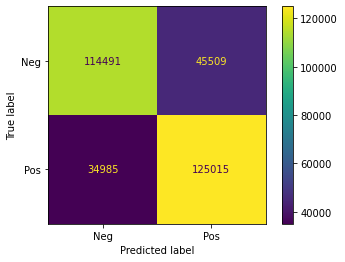

In [16]:
# confusion matrix on test set
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = conf_matrix.ravel()

from sklearn.metrics import ConfusionMatrixDisplay
dist = ConfusionMatrixDisplay(conf_matrix, display_labels=['Neg', 'Pos'])

dist.plot()
plt.show()